In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/iprofun/go_seq_combinded.tsv", sep='\t')

In [3]:
df.head()

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology,tissue,source
0,GO:0017001,0.000001,1.000000,6,18,antibiotic catabolic process,BP,soft_tissue,methy
1,GO:0005576,0.000198,0.999926,35,992,extracellular region,CC,soft_tissue,methy
2,GO:0044444,0.000275,0.999945,61,2396,cytoplasmic part,CC,soft_tissue,methy
3,GO:0044421,0.000330,0.999874,33,931,extracellular region part,CC,soft_tissue,methy
4,GO:0006068,0.000465,1.000000,2,2,ethanol catabolic process,BP,soft_tissue,methy


In [23]:
color_map = {
    'BP': sns.xkcd_rgb["medium green"],
    'CC': sns.xkcd_rgb["pale red"],
    'MF': sns.xkcd_rgb["denim blue"]
}

In [24]:
df['score'] = -np.log10(df['over_represented_pvalue'])
df['color'] = df['ontology'].map(lambda x:color_map[x])

In [27]:
df_cna = df[df['source']=='cna'].reset_index(drop=True)
df_methy = df[df['source']=='methy'].reset_index(drop=True)

In [70]:
topN = 20

# all cell lines

In [44]:
df_all_cna = df_cna[df_cna['tissue']=='all_cell_lines']
df_all_methy = df_methy[df_methy['tissue']=='all_cell_lines']

Text(0.5, 1.0, 'Top enriched GO from protein attenuation on CNA')

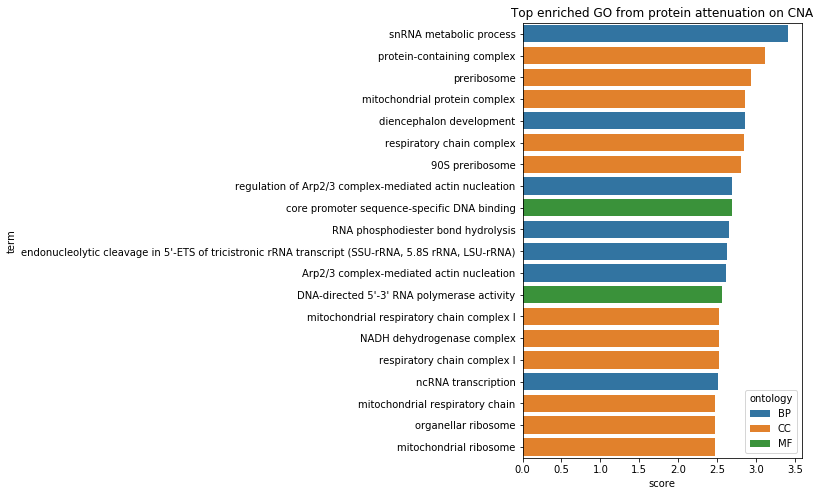

In [69]:
plt.figure(figsize=(5, 8))
g = sns.barplot(x='score',
                y='term',
                hue='ontology',
                data=df_all_cna.iloc[:topN, :],
                dodge=False)
plt.title("Top enriched GO from protein attenuation on CNA")

Text(0.5, 1.0, 'Top enriched GO from protein attenuation on Methylation')

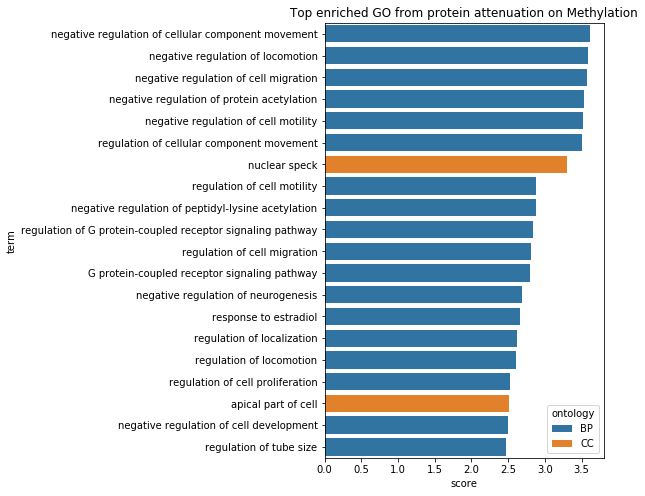

In [68]:
plt.figure(figsize=(5, 8))
g = sns.barplot(x='score',
                y='term',
                hue='ontology',
                data=df_all_methy.iloc[:topN, :],
                dodge=False)
plt.title("Top enriched GO from protein attenuation on Methylation")

# blood

In [71]:
df_all_cna = df_cna[df_cna['tissue']=='blood']
df_all_methy = df_methy[df_methy['tissue']=='blood']

Text(0.5, 1.0, 'Top enriched GO from protein attenuation on CNA')

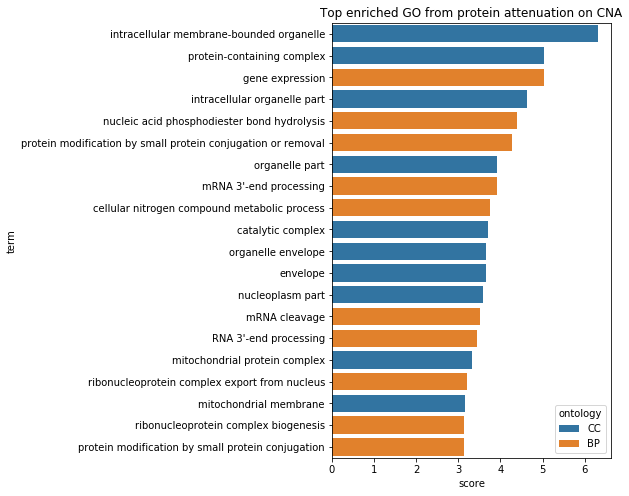

In [72]:
plt.figure(figsize=(5, 8))
g = sns.barplot(x='score',
                y='term',
                hue='ontology',
                data=df_all_cna.iloc[:topN, :],
                dodge=False)
plt.title("Top enriched GO from protein attenuation on CNA")

Text(0.5, 1.0, 'Top enriched GO from protein attenuation on Methylation')

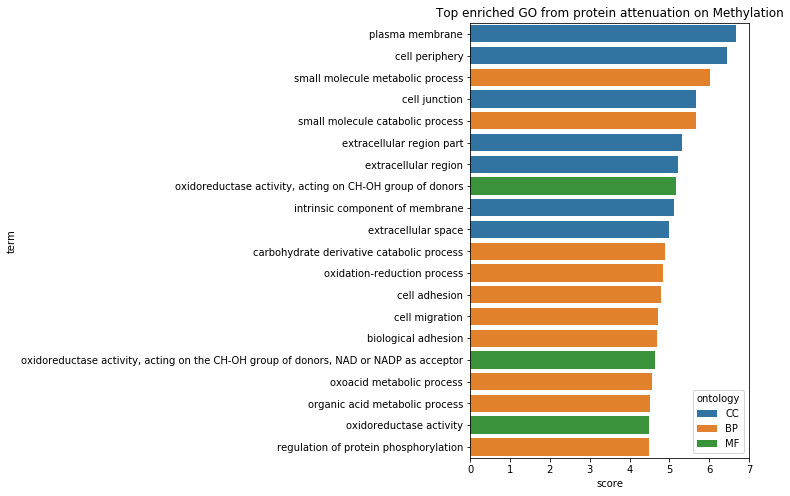

In [73]:
plt.figure(figsize=(5, 8))
g = sns.barplot(x='score',
                y='term',
                hue='ontology',
                data=df_all_methy.iloc[:topN, :],
                dodge=False)
plt.title("Top enriched GO from protein attenuation on Methylation")

# tissue heatmap

In [56]:
df_tissue_cna = df_cna[df_cna['tissue']!='all_cell_lines']
df_tissue_methy = df_methy[df_methy['tissue']!='all_cell_lines']

In [59]:
columns = ['category','tissue', 'score']
df_tissue_cna = df_tissue_cna[columns]
df_tissue_methy = df_tissue_methy[columns]

In [61]:
df_tissue_cna = pd.pivot(df_tissue_cna, index='category', columns='tissue')
df_tissue_methy = pd.pivot(df_tissue_methy, index='category', columns='tissue')

Text(0.5, 0.98, 'CNA')

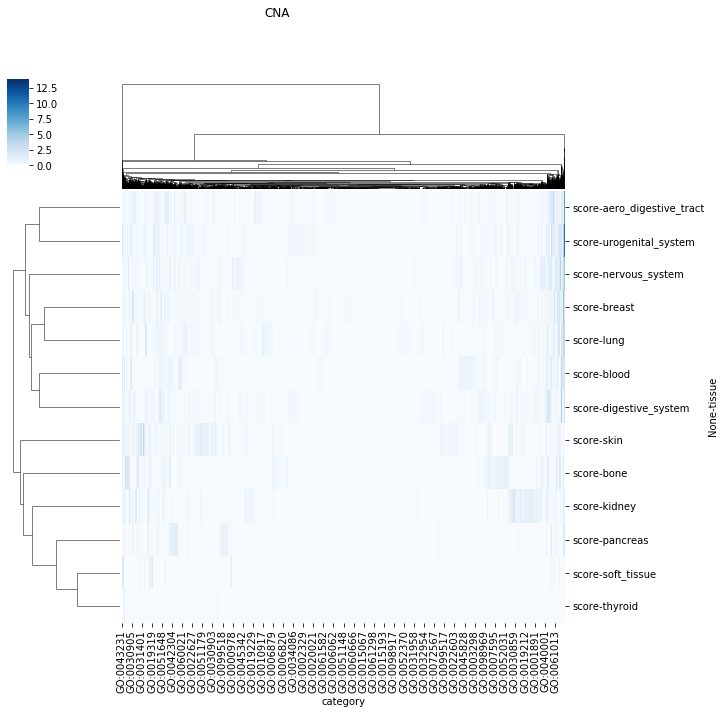

In [90]:
sns.clustermap(df_tissue_cna.T, cmap='Blues').fig.suptitle('CNA') 

Text(0.5, 0.98, 'Methylation')

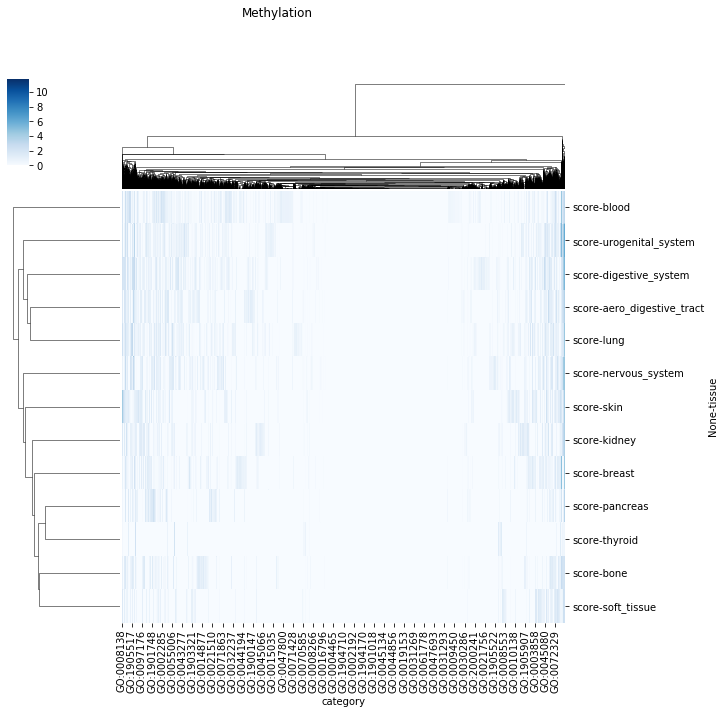

In [89]:
sns.clustermap(df_tissue_methy.T, cmap='Blues').fig.suptitle('Methylation') 